In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
root_path = 'gdrive/My Drive/Codes/shivank/CV'  #change dir to your project folder

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(root_path, train=".", valid_pct=0.2, ds_tfms=get_transforms(flip_vert=True, max_warp=0), size=224, bs=32, num_workers=0).normalize(imagenet_stats)

In [7]:
data.classes

['Parasitized', 'Uninfected']

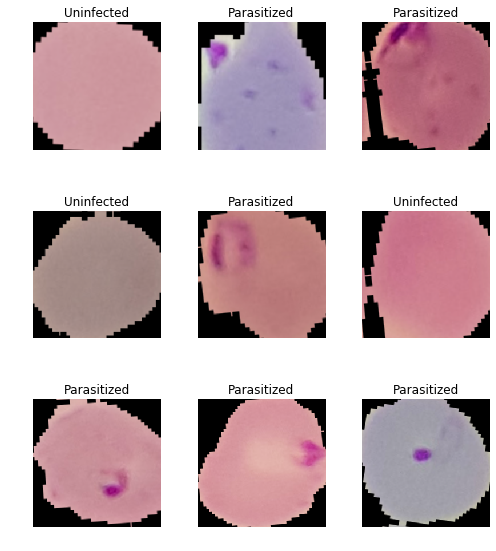

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 64929310.84it/s]


In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.37E-03


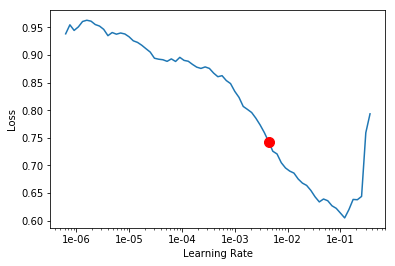

In [11]:
learn.recorder.plot(suggestion=True)

In [12]:
learn.fit_one_cycle(6, max_lr=slice(4.37e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.225685,0.168923,0.936532,1:28:22
1,0.172453,0.134675,0.950275,03:41
2,0.145643,0.122340,0.953023,03:40
3,0.154676,0.108146,0.961269,03:38
4,0.136006,0.107813,0.961020,03:40
5,0.123385,0.104028,0.961769,03:43


In [0]:
learn.save('stage-1')

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

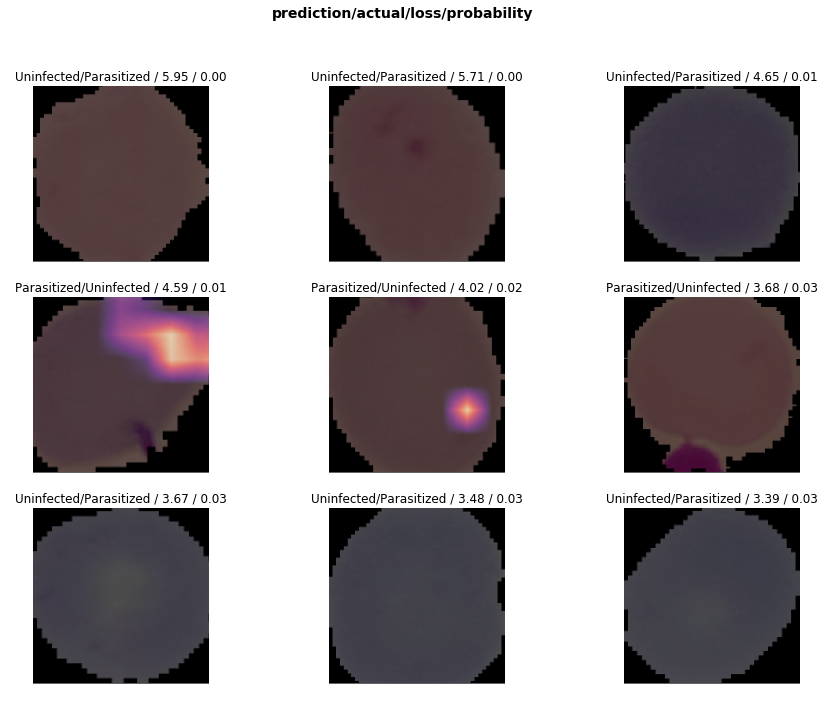

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-07


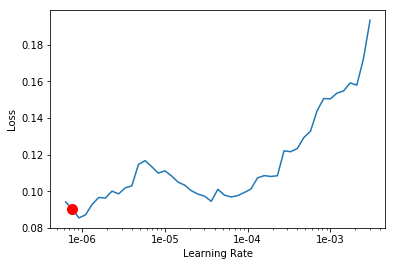

In [18]:
learn.recorder.plot(suggestion=True)

In [19]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-3)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.161510,0.117050,0.961269,04:05
1,0.126376,0.105231,0.965517,04:06
2,0.129907,0.090558,0.967766,04:07
3,0.092976,0.083512,0.970515,04:08


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

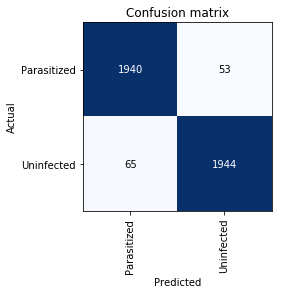

In [23]:
interp.plot_confusion_matrix()

In [0]:
learn.export()